C:\Users\ti-he\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
YOLOv5  v7.0-9-gf9ca365 Python-3.10.8 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


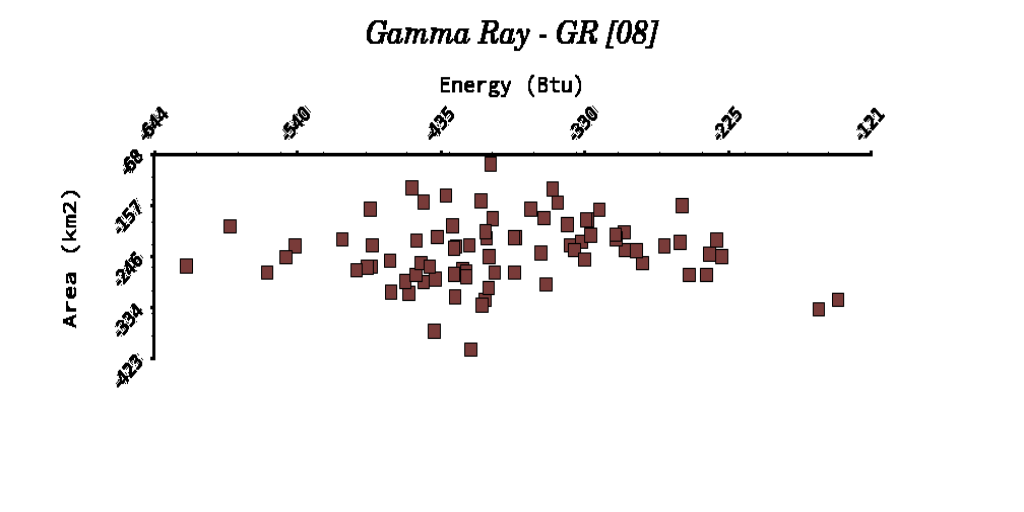

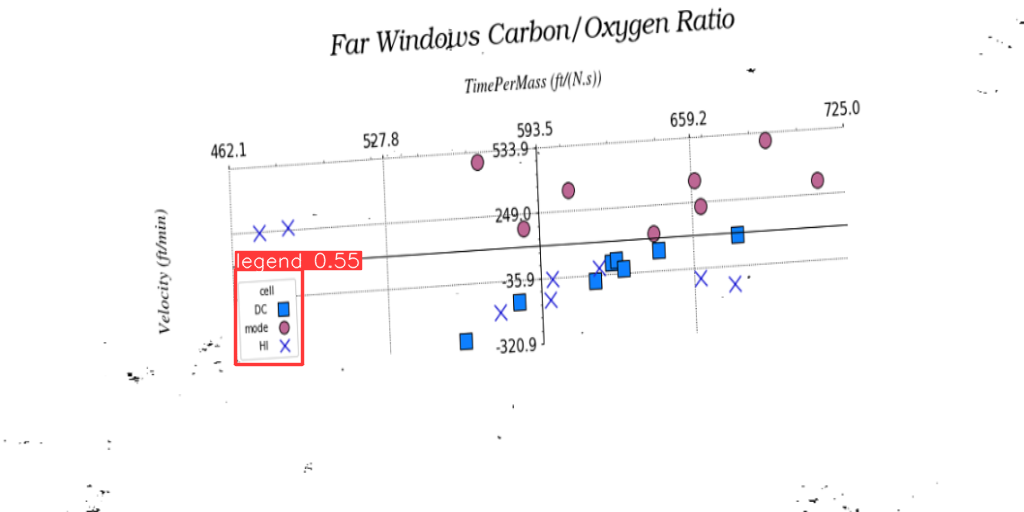

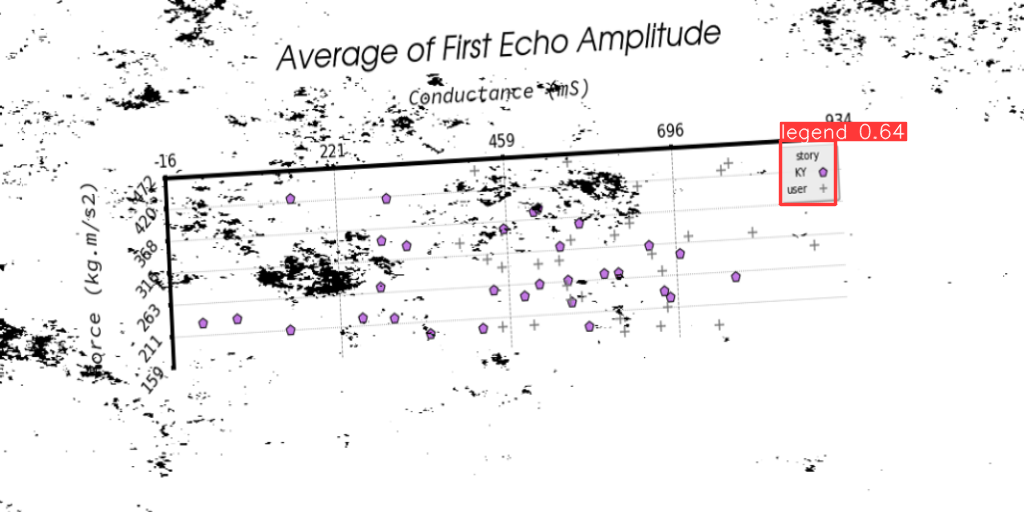

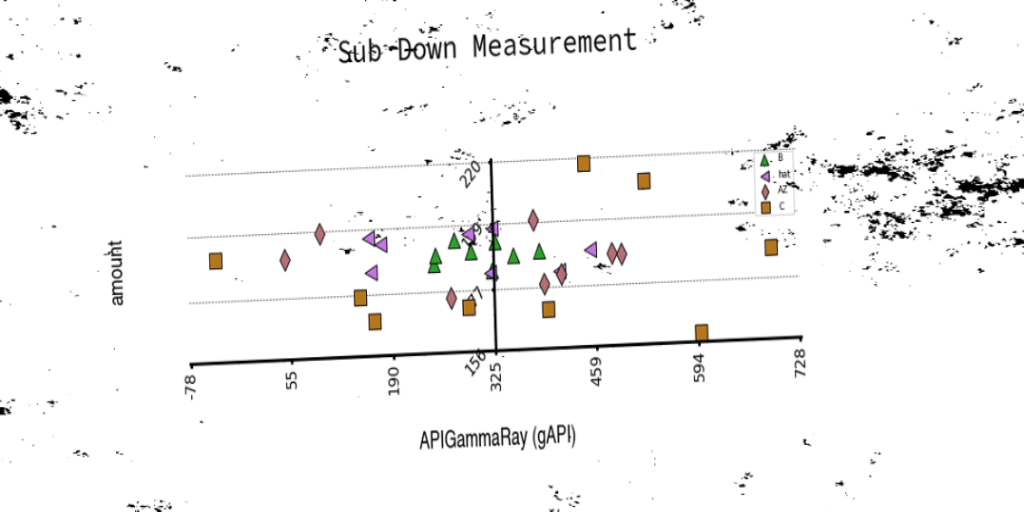

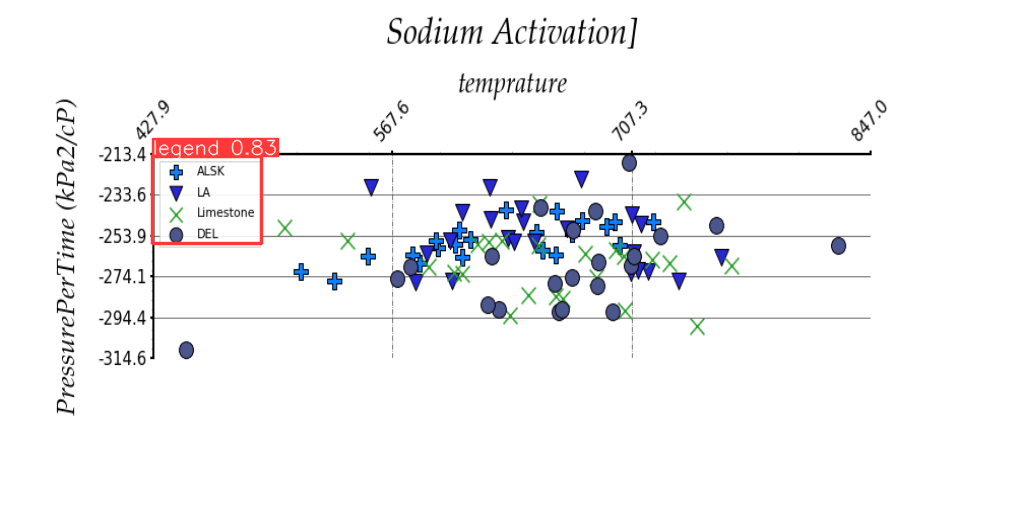

In [1]:
from glob import glob
import torch

model = torch.hub.load('../yolov5/', 'custom', path='best.pt', source='local')

im = r'raw_data\helvetios_challenge_dataset_training\images\*.png'  
im = list(glob(im))[:5]

# Inference
results = model(im)
results.show()

In [2]:
results.crop()[0]['box']

Saved 5 images to runs\detect\exp6
Saved results to runs\detect\exp6



[tensor(235.74516), tensor(269.92322), tensor(302.92816), tensor(364.39743)]

In [3]:
from PIL import Image
Image.fromarray(results.crop()[0]['im']).show()

Saved 5 images to runs\detect\exp7
Saved results to runs\detect\exp7



In [5]:
# import pytesseract
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

from ocr_models.preprocessing.preprocessor import Preprocessor
from ocr_models.pytesseract_eval import PytesseractEval

preprocessor = Preprocessor(deskew=True)
p = PytesseractEval(confidence=15, preprocessor=preprocessor)

img = results.crop()[0]['im']

text_from_image = p.predict(img)
print(text_from_image)

Saved 5 images to runs\detect\exp9
Saved results to runs\detect\exp9



[['all', 'mode', '@', 'HX']]
